In [7]:
from IPython.display import display, Image

In [8]:
# We learned how to deal with images.
# How about data other than images ?
# Recall the characteristics of CNN. CNN seems to work well on images, but how about text or audio ?
# Now, let's see how we can make model regarding text.

In [9]:
# The model optimized in dealing with text is called RNN.
# RNN = Recurrent Neural Network
# What is recurrence ?

We learned about cells in Fully Connected Neural Networks.


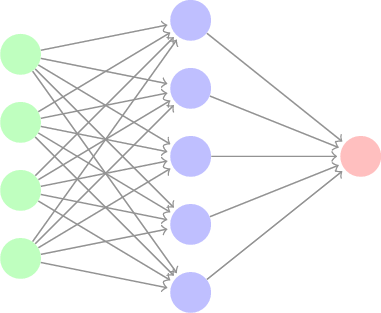

The cells above doesn't have recurrence. It's an one-pass


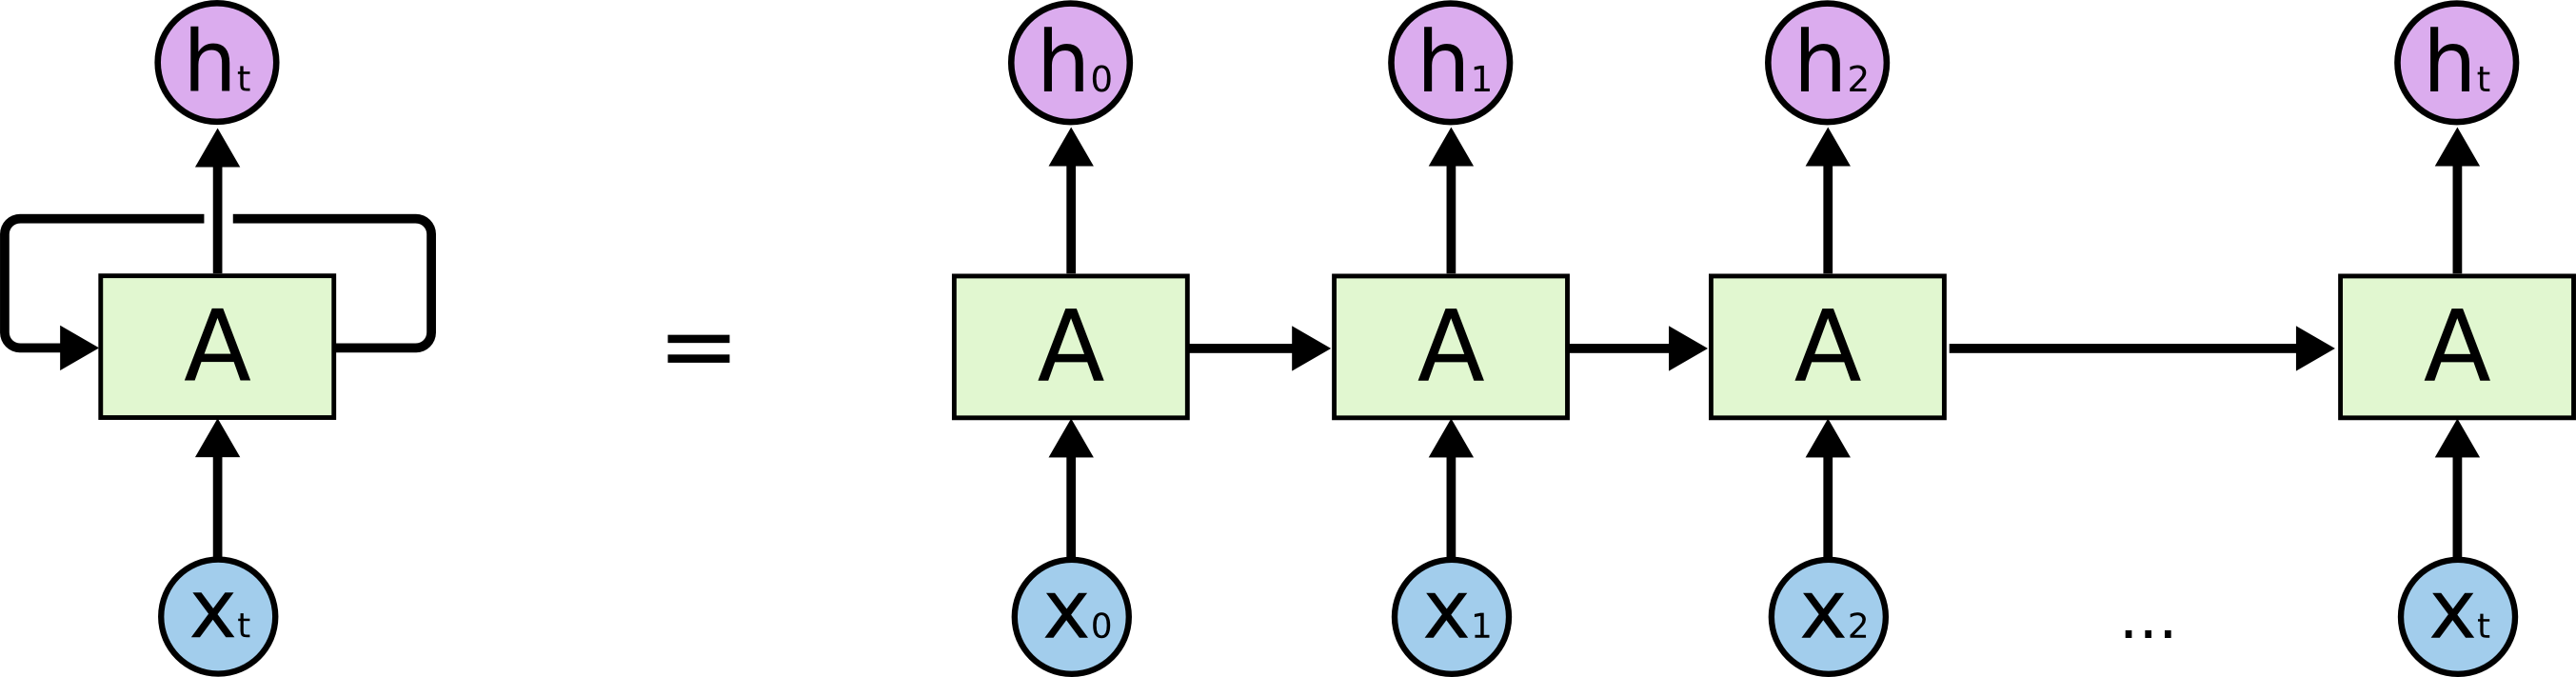

Note that the image below is from time 0 to t, whereas the fully connected neural network doesn't have time concept.
(The above picture takes 4 numbers as input.)

The cell itself is different from fully connected layer.
The dimension of input that will be fed into cell is different.


In [10]:
print("We learned about cells in Fully Connected Neural Networks.")
with open('./fc.png','rb') as file:
    display(Image(file.read()))
print("The cells above doesn't have recurrence. It's an one-pass")
with open('./RNN-unrolled.png','rb') as file:
    display(Image(file.read()))
print("Note that the image below is from time 0 to t, whereas the fully connected neural network doesn't have time concept.")
print("(The above picture takes 4 numbers as input.)\n")
print("The cell itself is different from fully connected layer.")
print("The dimension of input that will be fed into cell is different.")


Another way to represent the above picture is as below.
The cells takes in the input, and the hidden state it produced in the previous step.


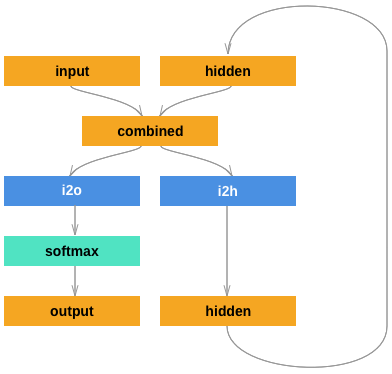

In [11]:
print("Another way to represent the above picture is as below.")
print("The cells takes in the input, and the hidden state it produced in the previous step.")
with open('./lstm2.png','rb') as file:
    display(Image(file.read()))

However, RNN doesn't work well when the input and output is far from each other.


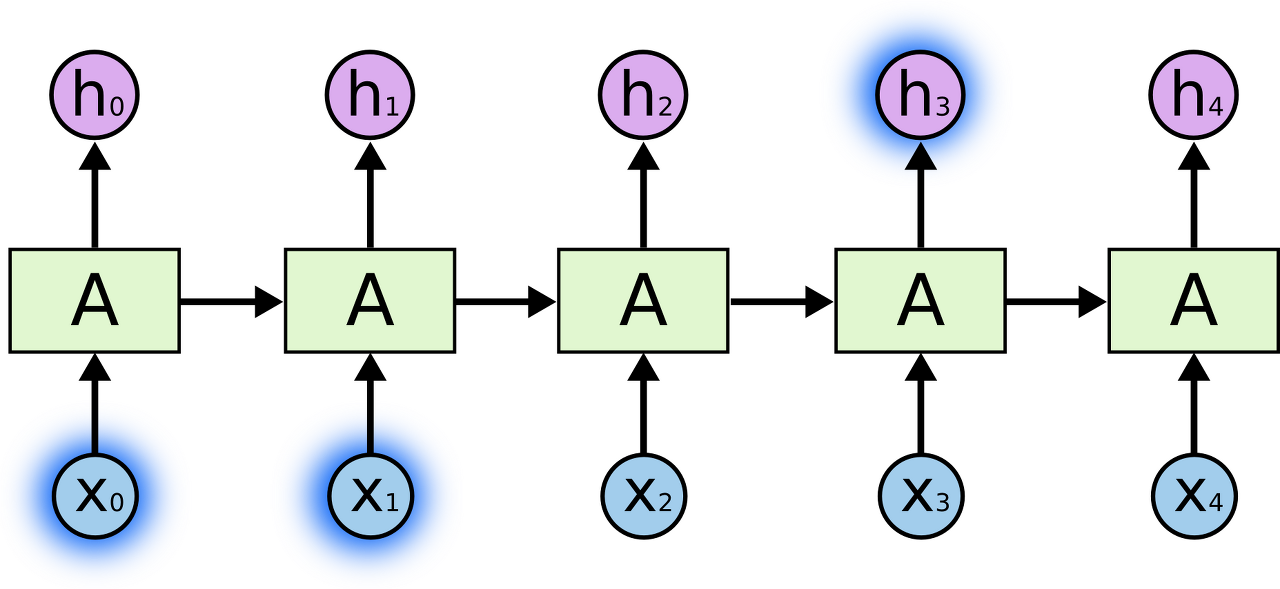

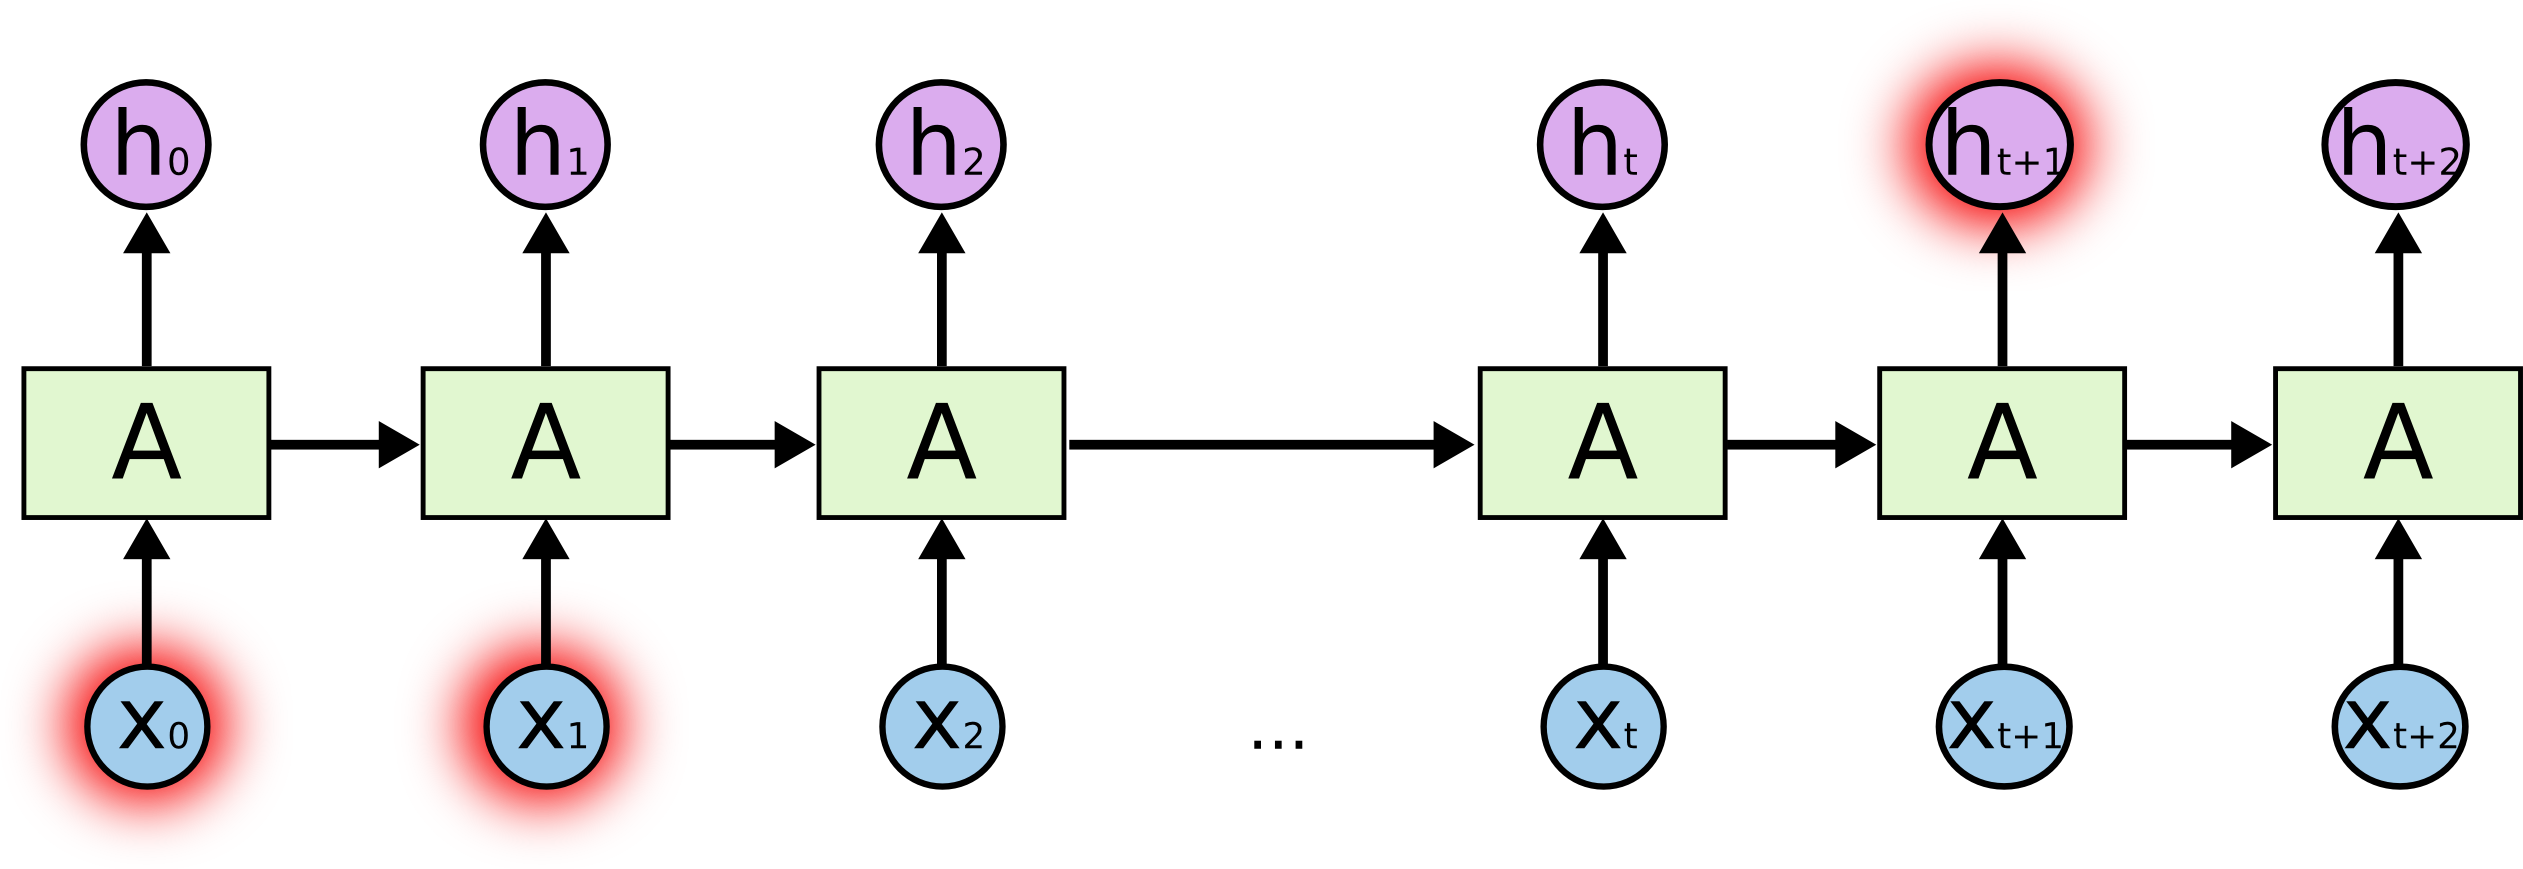

In [12]:
print("However, RNN doesn't work well when the input and output is far from each other.")
with open('./rnn-short.png','rb') as file:
    display(Image(file.read()))
with open('./rnn-long.png','rb') as file:
    display(Image(file.read()))

To resolve the problem mentioned above, a new cell named LSTM appeared.
The RNN cell has a very simple structure like in the picture right below.


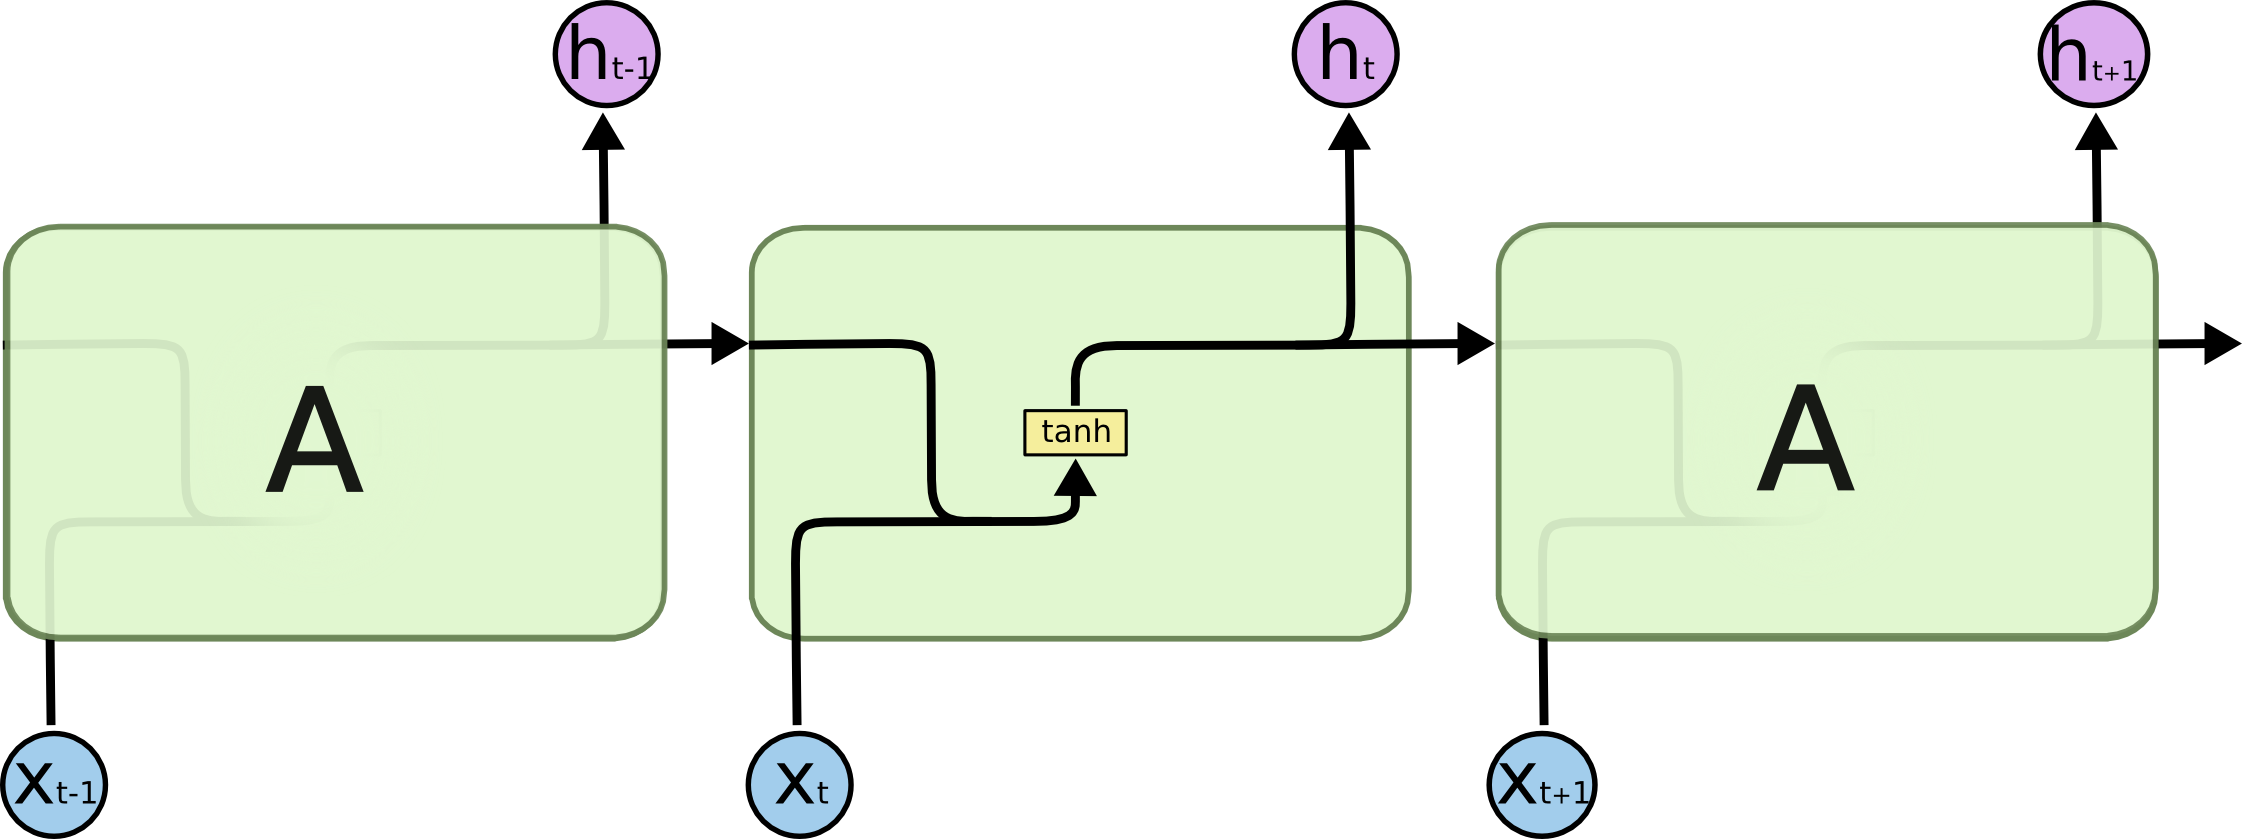

The LSTM cell has a bit more complicated structure.


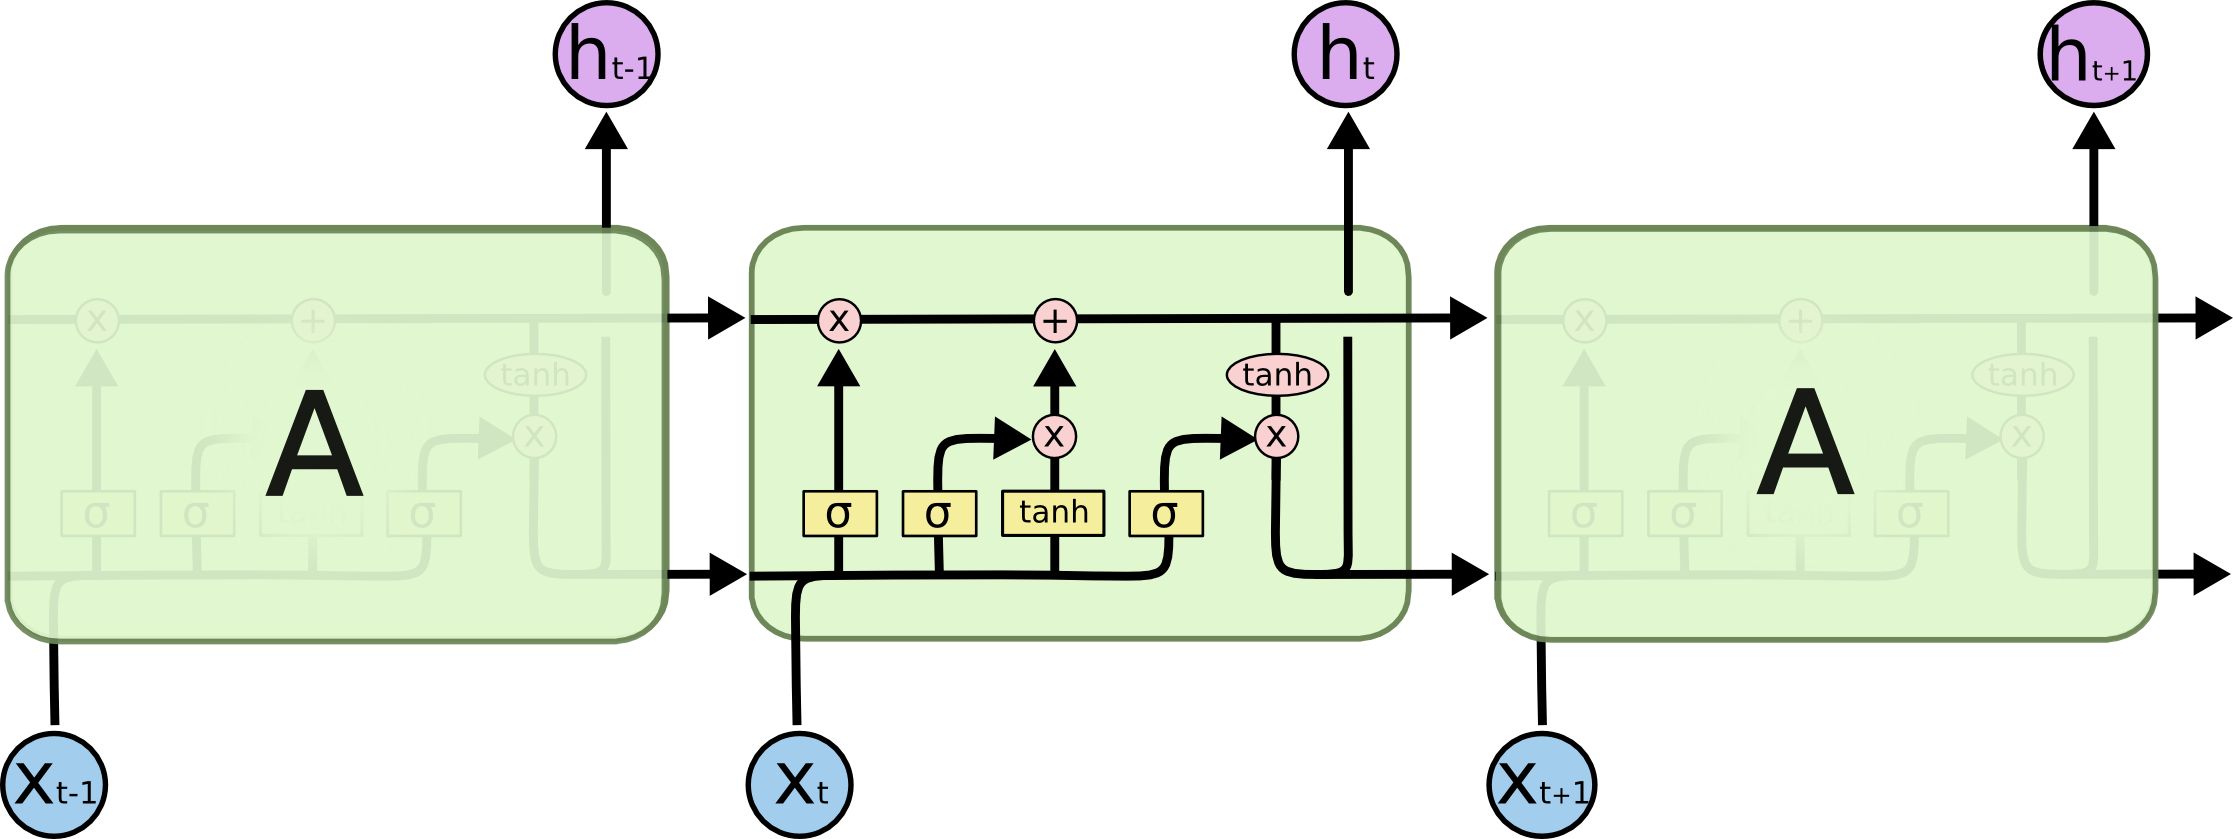

The understanding of whole math formulas related to Deep Learning is not fundamental at this point.
I recommend that you understand JUST the CONCEPTS, the KEY idea.
The key difference is that in LSTM, there is a flow of minor linear interactions.


In [13]:
print("To resolve the problem mentioned above, a new cell named LSTM appeared.")
print("The RNN cell has a very simple structure like in the picture right below.")
with open('./rnncell.png','rb') as file:
    display(Image(file.read()))
print("The LSTM cell has a bit more complicated structure.")
with open('./lstmcell.png','rb') as file:
    display(Image(file.read()))
print("The understanding of whole math formulas related to Deep Learning is not fundamental at this point.")
print("I recommend that you understand JUST the CONCEPTS, the KEY idea.")
print("The key difference is that in LSTM, there is a flow of minor linear interactions.")

In [14]:
print("There are other RNN affiliations -> LSTM, GRU")
print("Now, let's dive into simple codes.")

There are other RNN affiliations -> LSTM, GRU
Now, let's dive into simple codes.


In [15]:
import torch.nn as nn
import torch
from torch.utils import data

# Suppose we have a task of classifying either Pass (0) / Fail (1)
# We have user's sequential response of sequence 10 (Each response is a test result)
# The feature is number ranging from 0 to 100.
# The label is categorical, either 0 or 1.

# Sample Dataset
class SampleDataset(data.Dataset):
    def __init__(self):
        super().__init__()
        self.input = torch.randint(0, 101, size=(512, 10))
        self.output = torch.randint(0, 10, size=(512, 1))
        
    def __len__(self):
        return len(self.input)
    
    def __getitem__(self, index):
        return self.input[index], self.output[index]

In [16]:
# nn.LSTM is important, but with even importance, nn.Embedding is important.
# Mainly, there are 2 types of embeddings.
# 1. Word2Vec -> Static Embedding that is set before training.
# 2. nn.Embedding -> Dynamic Embedding that is jointly learnt with model training.

# nn.Embedding is a lookup table, like python dictionary.
# nn.Embedding(100, 128) will be a matrix of shape (100, 128), with 100 keys.
# Each value will be 128 dimensional matrix.

In [17]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_embeddings = nn.Embedding(num_embeddings=101, embedding_dim=128)
        self.lstm = nn.LSTM(batch_first=True, input_size=128, hidden_size=64, num_layers=3)
        self.fc1 = nn.Linear(640, 32)
        self.fc2 = nn.Linear(32, 1)
    def forward(self, feature):
        embedded_input = self.input_embeddings(feature)
        batch_size = feature.shape[0]
        result, _ = self.lstm(embedded_input)
        fc_input = result.reshape(batch_size, -1)
        fc_output1 = self.fc1(fc_input)
        fc_output2 = self.fc2(fc_output1)
        return fc_output2

In [18]:
sample_dataset = SampleDataset()
sample_datagenerator = data.DataLoader(sample_dataset, batch_size=16)
model = LSTM()

for batch_feature, batch_label in sample_datagenerator:
    result = model(batch_feature)
    print(result)
    ground_truth = batch_label

tensor([[0.0367],
        [0.0412],
        [0.0410],
        [0.0398],
        [0.0364],
        [0.0394],
        [0.0371],
        [0.0393],
        [0.0357],
        [0.0366],
        [0.0394],
        [0.0421],
        [0.0391],
        [0.0386],
        [0.0374],
        [0.0401]], grad_fn=<AddmmBackward>)
tensor([[0.0382],
        [0.0395],
        [0.0357],
        [0.0379],
        [0.0393],
        [0.0430],
        [0.0382],
        [0.0411],
        [0.0388],
        [0.0396],
        [0.0370],
        [0.0396],
        [0.0384],
        [0.0379],
        [0.0376],
        [0.0392]], grad_fn=<AddmmBackward>)
tensor([[0.0370],
        [0.0373],
        [0.0384],
        [0.0405],
        [0.0335],
        [0.0352],
        [0.0396],
        [0.0398],
        [0.0410],
        [0.0401],
        [0.0400],
        [0.0366],
        [0.0376],
        [0.0390],
        [0.0410],
        [0.0429]], grad_fn=<AddmmBackward>)
tensor([[0.0368],
        [0.0389],
        [0.0439],
    

In [19]:
print("Model inference time is relatively long. Why?")
print("The concept of Teacher Forcing.")
print("If Teacher forcing, we use actual next token as next input")
print("If not, use predicted token.")
print("The training phase and inference phase have a gap..")

Model inference time is relatively long. Why?
The concept of Teacher Forcing.
If Teacher forcing, we use actual next token as next input
If not, use predicted token.
The training phase and inference phase have a gap..
